In [ ]:
#Daisy Rivera, 04/20/2025

Project 1

Your CEO has decided that the company needs a full-time data scientist, and possibly a team of them in the future. She thinks she needs someone who can help drive data science within then entire organization and could potentially lead a team in the future. She understands that data scientist salaries vary widely across the world and is unsure what to pay them. To complicate matters, salaries are going up due to the great recession and the market is highly competitive. Your CEO has asked you to prepare an analysis on data science salaries and provide them with a range to be competitive and get top talent. The position can work offshore, but the CEO would like to know what the difference is for a person working in the United States. Your company is currently a small company but is expanding rapidly. 

Prepare your analysis in an R file. Your final product should be a power point presentation giving your recommendation to the CEO. CEOs do not care about your code and don’t want to see it. They want to see visuals and a well thought out analysis. You will need to turn in the power point and the code as a flat R file. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [11]:
infile = "data/daisy_rivera.module05RProject.csv"
ds_salaries_df=pd.read_csv(infile)

ds_salaries_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [12]:
list(ds_salaries_df.columns)

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [14]:
data_scientists = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Scientist']

avg_salary_by_location = data_scientists.groupby('company_location')['salary_in_usd'].mean().round(2).reset_index()

avg_salary_by_location.sort_values(by='salary_in_usd', ascending=False).head(10)


,company_location,salary_in_usd
22,US,143115.68
4,CH,122346.00
12,IL,119059.00
7,DZ,100000.00
10,GB,88177.36
1,AU,86703.00
3,CA,77787.00
0,AT,76352.00
6,DE,69640.14
15,LU,62726.00


In [15]:
data_scientists = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Scientist']

global_avg_salary = data_scientists['salary_in_usd'].mean()
global_min_salary = data_scientists['salary_in_usd'].min()
global_max_salary = data_scientists['salary_in_usd'].max()

print(f"Global Average Salary: ${round(global_avg_salary):,}")
print(f"Global Minimum Salary: ${round(global_min_salary):,}")
print(f"Global Maximum Salary: ${round(global_max_salary):,}")


Global Average Salary: $108,188
Global Minimum Salary: $2,859
Global Maximum Salary: $412,000


In [7]:
us_data_scientists = data_scientists[data_scientists['employee_residence'] == 'US']

us_avg_salary = us_data_scientists['salary_in_usd'].mean()
us_min_salary = us_data_scientists['salary_in_usd'].min()
us_max_salary = us_data_scientists['salary_in_usd'].max()

print(f"U.S. Average Salary: ${round(us_avg_salary):,}")
print(f"U.S. Minimum Salary: ${round(us_min_salary):,}")
print(f"U.S. Maximum Salary: ${round(us_max_salary):,}")

U.S. Average Salary: $149,408
U.S. Minimum Salary: $58,000
U.S. Maximum Salary: $412,000


In [61]:
percent_difference = ((us_avg_salary - global_avg_salary) / global_avg_salary) * 100

print(percent_difference)

38.10086618757243


In [19]:
data_scientists = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Scientist']

data_scientists.loc[:, 'experience_level'] = data_scientists['experience_level'].replace({
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EX': 'Executive'
})

In [20]:
exp_level = data_scientists.groupby('experience_level')['salary_in_usd'].agg(
    avg_salary='mean',
    min_salary='min',
    max_salary='max',
    median_salary='median'
).round(0).astype(int).reset_index()

print(exp_level)

  experience_level  avg_salary  min_salary  max_salary  median_salary
0      Entry-level       55331        4000      105000          50484
1        Mid-level       82039        2859      200000          77479
2           Senior      152971       20171      412000         140400


In [57]:
data_scientists = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Scientist'].copy()

data_scientists['remote_status'] = data_scientists['remote_ratio'].map({
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
})

remote_salary = data_scientists.groupby('remote_status')['salary_in_usd'].mean().round(0).astype(int).reset_index()
print(remote_salary)

  remote_status  salary_in_usd
0        Hybrid          74504
1       On-site          99521
2        Remote         123126


C:\Users\daisy\AppData\Local\Temp\ipykernel_14092\2394195481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=remote_avg, x='remote_status', y='salary_in_usd', palette='Paired')


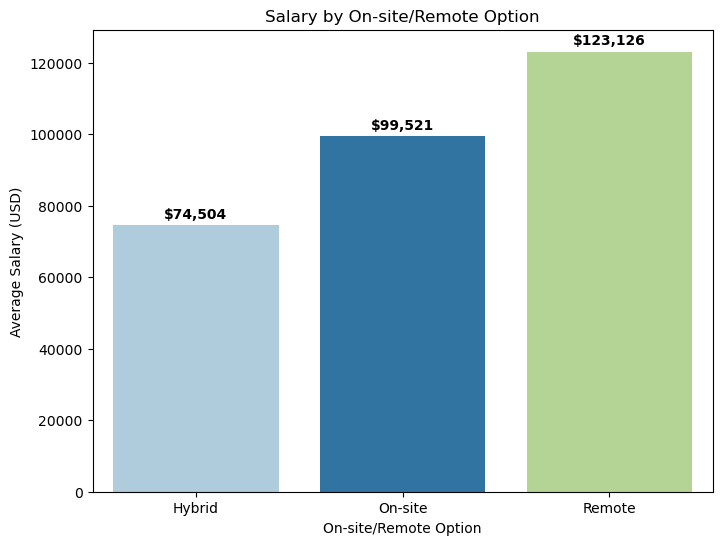

In [40]:
remote_avg = data_scientists.groupby('remote_status')['salary_in_usd'].mean().round(0).astype(int).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=remote_avg, x='remote_status', y='salary_in_usd', palette='Paired')

for index, row in remote_avg.iterrows():
    plt.text(index, row['salary_in_usd'] + 2000, f"${row['salary_in_usd']:,}", 
             ha='center', fontweight='bold')

plt.title("Salary by On-site/Remote Option")
plt.ylabel("Average Salary (USD)")
plt.xlabel("On-site/Remote Option")
plt.show()

In [42]:
data_scientists.loc[:, 'company_size'] = data_scientists['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

company_size_salary = data_scientists.groupby('company_size')['salary_in_usd'].mean().round(0).astype(int).reset_index()

print(company_size_salary)


  company_size  salary_in_usd
0        Large         103313
1       Medium         126381
2        Small          51926


C:\Users\daisy\AppData\Local\Temp\ipykernel_14092\1240318588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


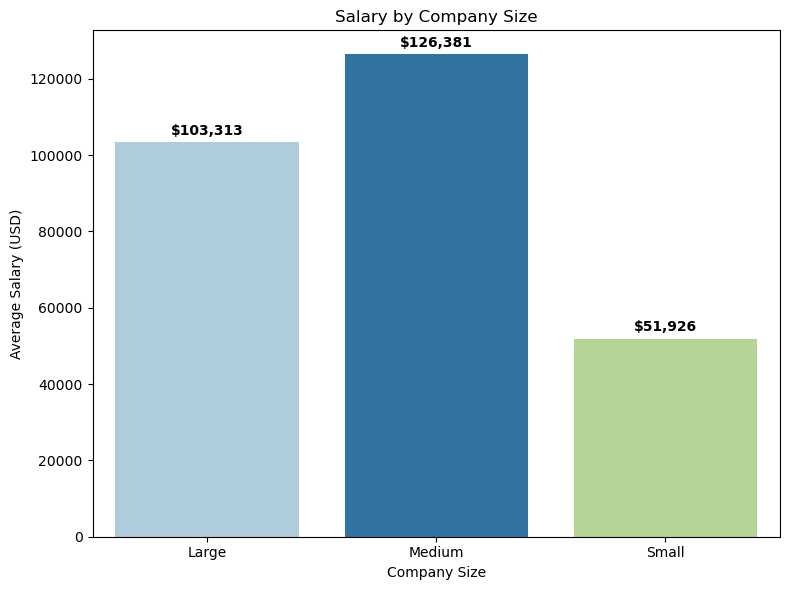

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=company_size_salary,
    x='company_size',
    y='salary_in_usd',
    palette='Paired'
)


for index, row in company_size_salary.iterrows():
    plt.text(index, row['salary_in_usd'] + 2000, f"${row['salary_in_usd']:,}",
             ha='center', fontweight='bold')

plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.savefig("salary_by_company_size_paired_palette.png")
plt.show()